In [149]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET='TINYAES128C'
SS_VER='SS_VER_1_1'

In [184]:
%run "Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [185]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../hardware/victims/firmware/simpleserial-blowfish
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$3 -j

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
arm-none-eabi-gcc (Arch Repository) 13.2.0
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Welcome to another exciting ChipWhisperer target build!!
.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././simpleserial/ -I.././crypto/ .././hal/stm32f3/stm32f3_startup.S -o objdir-CWLITEARM/stm32f3_sta

/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thumb/v7e-m/nofp/libg_nano.a(libc_a-closer.o): in function `_close_r':
/build/arm-none-eabi-newlib/src/build-nano/arm-none-eabi/thumb/v7e-m/nofp/newlib/../../../../../../newlib-4.3.0.20230120/newlib/libc/reent/closer.c:47:(.text._close_r+0xc): warning: _close is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thumb/v7e-m/nofp/libg_nano.a(libc_a-lseekr.o): in function `_lseek_r':
/build/arm-none-eabi-newlib/src/build-nano/arm-none-eabi/thumb/v7e-m/nofp/newlib/../../../../../../newlib-4.3.0.20230120/newlib/libc/reent/lseekr.c:49:(.text._lseek_r+0x10): warning: _lseek is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thu

.
Creating load file for Flash: simpleserial-blowfish-CWLITEARM.bin
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.bin
.
Creating load file for Flash: simpleserial-blowfish-CWLITEARM.hex
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.hex
.
Creating load file for EEPROM: simpleserial-blowfish-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.eep || exit 0
.
Creating Extended Listing: simpleserial-blowfish-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z simpleserial-blowfish-CWLITEARM.elf > simpleserial-blowfish-CWLITEARM.lss
.
Creating Symbol Table: simpleserial-blowfish-CWLITEARM.sym
arm-none-eabi-nm -n simpleserial-blowfish-CWLITEARM.el

In [186]:
cw.program_target(scope, prog, "../hardware/victims/firmware/simpleserial-blowfish/simpleserial-blowfish-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11547 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11547 bytes


In [188]:
scope.adc.samples = 5000
# discards the first 500 samples
#scope.adc.offset = 500
#scope.adc.decimate = 10

In [189]:
from tqdm.notebook import trange
import numpy as np
import time

ktp = cw.ktp.Basic()
trace_array = []
textin_array = []

# key, text = ktp.next()

#target.set_key(key)

N = 1
for i in trange(N, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', b"yatKuxBK")
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 8)
    
    trace_array.append(scope.get_last_trace())
print(response.hex())

Capturing traces:   0%|          | 0/1 [00:00<?, ?it/s]

088e36c6c7f8d696


<IPython.core.display.Javascript object>


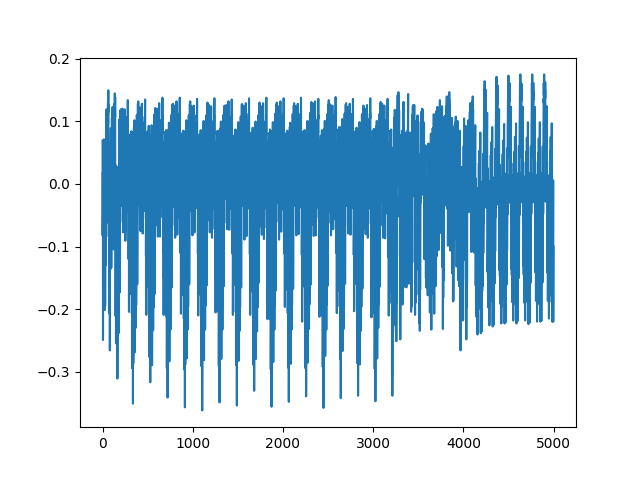

In [190]:
%matplotlib notebook
import matplotlib.pylab as plt
plt.plot(trace_array[0])
plt.show()